# Student Performance Analysis

## Introduction

This analysis uses the Student Performance Dataset from the UCI Machine Learning Repository ([download link](https://archive.ics.uci.edu/dataset/320/student+performance)). The dataset contains academic performance records of secondary school students in two distinct subjects: Mathematics and Portuguese language.

### Data Description
The dataset includes information about:
- Student demographics (school, sex, age, address, family size)
- Family background (parents' education, jobs, and family relationships)
- Study habits (study time, extra paid classes, extracurricular activities)
- Social behaviors (going out, alcohol consumption, relationships)
- Academic performance (absences and grades: G1, G2, G3)

### Research Focus
In this analysis, we explore two main relationships:
1. The correlation between Mathematics and Portuguese language grades to understand if performance is consistent across subjects
2. The impact of study time on academic performance in both subjects

Through these analyses, we aim to understand how students' performance varies across subjects and how study habits influence their academic achievements.

In [ ]:
# libs
import plotly.io as pio

pio.renderers.default = "vscode+jupyterlab+notebook_connected"



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the data and Merge

In [2]:
data_math = pd.read_csv('./student/student-mat.csv', sep=';')
data_por = pd.read_csv('./student/student-por.csv', sep=';')


Let's check the original data

In [3]:
data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Let's check the basic information of the data


In [5]:
# Let's check the shape of the data
print(data_math.shape)
print(data_por.shape)


(395, 33)
(649, 33)


We can find that the math data has 395 rows and 33 columns, while the por data has 649 rows and 33 columns.

Now let's merge the two data.


In [6]:
common_columns = ["school", "sex", "age", "address", "famsize", "Pstatus", 
                 "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"]

merged_data = pd.merge(data_math, data_por, on=common_columns)

# Check the number of rows in merged dataset
print(f"Number of students in merged dataset: {len(merged_data)}")

Number of students in merged dataset: 382


We can find that the merged dataset has 382 rows, which is less than the sum of the two original datasets. This is because some students have the same values for the common columns, so they are dropped during the merge process.

We need to check the data quality of the merged dataset.

- Does the merged dataset have missing values?
- Does the merged dataset have error data types?



In [7]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   school        382 non-null    object
 1   sex           382 non-null    object
 2   age           382 non-null    int64 
 3   address       382 non-null    object
 4   famsize       382 non-null    object
 5   Pstatus       382 non-null    object
 6   Medu          382 non-null    int64 
 7   Fedu          382 non-null    int64 
 8   Mjob          382 non-null    object
 9   Fjob          382 non-null    object
 10  reason        382 non-null    object
 11  guardian_x    382 non-null    object
 12  traveltime_x  382 non-null    int64 
 13  studytime_x   382 non-null    int64 
 14  failures_x    382 non-null    int64 
 15  schoolsup_x   382 non-null    object
 16  famsup_x      382 non-null    object
 17  paid_x        382 non-null    object
 18  activities_x  382 non-null    object
 19  nursery 

There are no missing values in the merged dataset, and the data types are correct.

In [8]:
merged_data.columns


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian_x', 'traveltime_x', 'studytime_x',
       'failures_x', 'schoolsup_x', 'famsup_x', 'paid_x', 'activities_x',
       'nursery', 'higher_x', 'internet', 'romantic_x', 'famrel_x',
       'freetime_x', 'goout_x', 'Dalc_x', 'Walc_x', 'health_x', 'absences_x',
       'G1_x', 'G2_x', 'G3_x', 'guardian_y', 'traveltime_y', 'studytime_y',
       'failures_y', 'schoolsup_y', 'famsup_y', 'paid_y', 'activities_y',
       'higher_y', 'romantic_y', 'famrel_y', 'freetime_y', 'goout_y', 'Dalc_y',
       'Walc_y', 'health_y', 'absences_y', 'G1_y', 'G2_y', 'G3_y'],
      dtype='object')

## Data Visualization


### Math VS Portuguese Grades

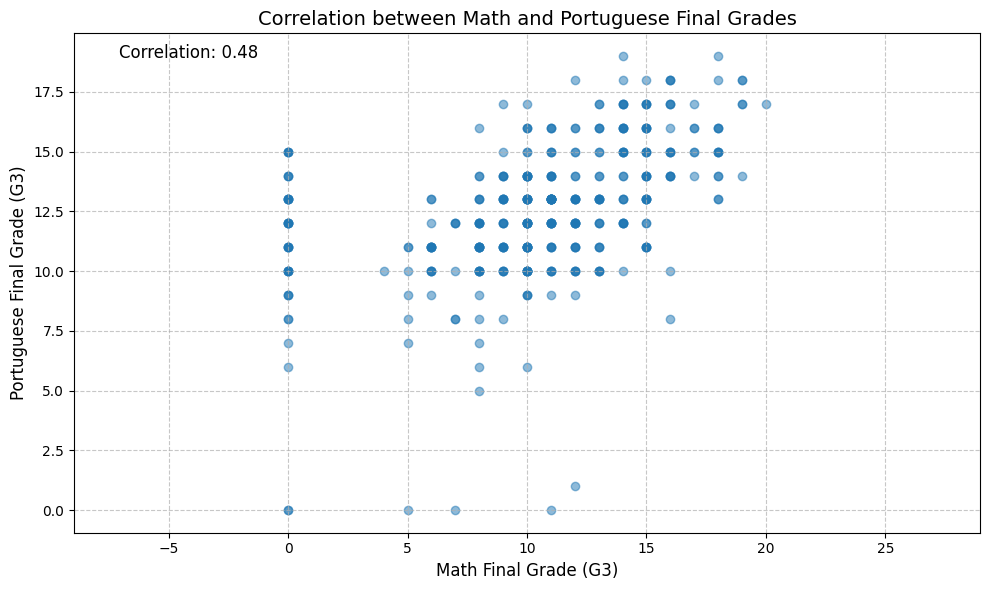

Correlation coefficient between Math and Portuguese grades: 0.480


In [25]:
plt.figure(figsize=(10, 6))

plt.scatter(merged_data['G3_x'], merged_data['G3_y'], alpha=0.5)

# Add title and labels
plt.title('Correlation between Math and Portuguese Final Grades', fontsize=14)
plt.xlabel('Math Final Grade (G3)', fontsize=12)
plt.ylabel('Portuguese Final Grade (G3)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

# Add correlation coefficient
correlation = merged_data['G3_x'].corr(merged_data['G3_y'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes, fontsize=12)

plt.xlim(0, 20)
plt.ylim(0, 20)

plt.axis('equal')

plt.tight_layout()
plt.show()

print(f"Correlation coefficient between Math and Portuguese grades: {correlation:.3f}")



Math and Portuguese grades show a moderate positive correlation (correlation coefficient 0.480). However, the data reveals two distinct patterns: while most students' grades demonstrate a positive correlation between the two subjects, there is a subset of students who scored 0 in Math but achieved normal scores in Portuguese, and this anomalous pattern affects the overall correlation.

Let's check the students who got 0 in math.

Number of students with Math score = 0: 39
Number of students with Math score > 0: 343
Correlation coefficient (excluding Math=0): 0.558


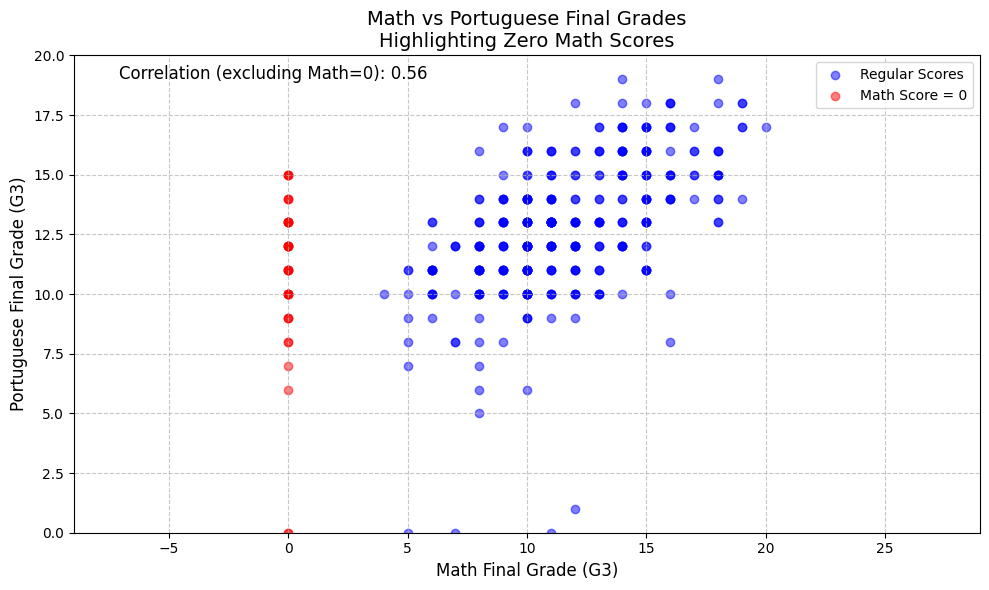

In [27]:
plt.figure(figsize=(10, 6))

zero_math = merged_data[merged_data['G3_x'] == 0]
non_zero_math = merged_data[merged_data['G3_x'] != 0]

plt.scatter(non_zero_math['G3_x'], non_zero_math['G3_y'], 
           alpha=0.5, label='Regular Scores', color='blue')

plt.scatter(zero_math['G3_x'], zero_math['G3_y'], 
           alpha=0.5, label='Math Score = 0', color='red')

plt.title('Math vs Portuguese Final Grades\nHighlighting Zero Math Scores', fontsize=14)
plt.xlabel('Math Final Grade (G3)', fontsize=12)
plt.ylabel('Portuguese Final Grade (G3)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.legend()

corr_non_zero = non_zero_math['G3_x'].corr(non_zero_math['G3_y'])
plt.text(0.05, 0.95, f'Correlation (excluding Math=0): {corr_non_zero:.2f}', 
         transform=plt.gca().transAxes, fontsize=12)

print(f"Number of students with Math score = 0: {len(zero_math)}")
print(f"Number of students with Math score > 0: {len(non_zero_math)}")
print(f"Correlation coefficient (excluding Math=0): {corr_non_zero:.3f}")

plt.axis('equal')
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.tight_layout()
plt.show()

Further analysis reveals that among 382 students, 39 received zero scores in Math while maintaining normal Portuguese grades. When excluding these cases, the correlation coefficient increases to 0.558, indicating a stronger relationship between the two subjects.

Let's check why the students got 0 in math, missing exam or really bad performance?

In [29]:
# check the absences and failures of the students who got 0 in math
zero_math_students = merged_data[merged_data['G3_x'] == 0]
print("For students with Math score = 0:")
print(f"Average absences in Math: {zero_math_students['absences_x'].mean():.2f}")
print(f"Average failures in Math: {zero_math_students['failures_x'].mean():.2f}")

For students with Math score = 0:
Average absences in Math: 0.00
Average failures in Math: 0.92


Interestingly, students who scored 0 in Math showed no absences but had an average of 0.92 failures, suggesting these zero scores likely represent actual exam performance rather than missed tests.

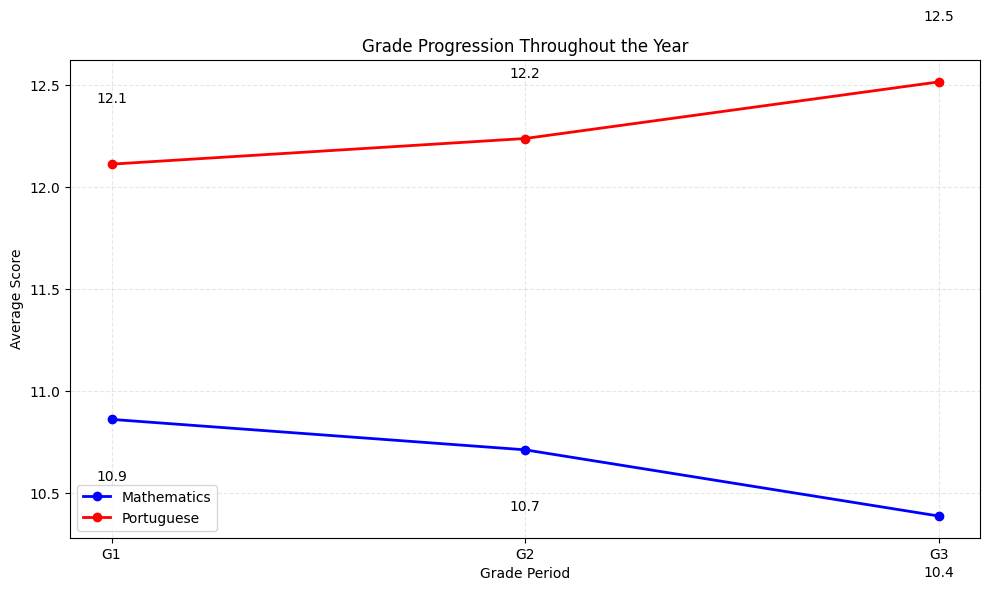


Mathematics average scores:
G1: 10.86
G2: 10.71
G3: 10.39

Portuguese average scores:
G1: 12.11
G2: 12.24
G3: 12.52


In [11]:
plt.figure(figsize=(10, 6))

math_scores = [
    merged_data['G1_x'].mean(),
    merged_data['G2_x'].mean(),
    merged_data['G3_x'].mean()
]

portuguese_scores = [
    merged_data['G1_y'].mean(),
    merged_data['G2_y'].mean(),
    merged_data['G3_y'].mean()
]

plt.plot([1, 2, 3], math_scores, 'b-o', label='Mathematics', linewidth=2)
plt.plot([1, 2, 3], portuguese_scores, 'r-o', label='Portuguese', linewidth=2)

plt.title('Grade Progression Throughout the Year')
plt.xlabel('Grade Period')
plt.ylabel('Average Score')
plt.xticks([1, 2, 3], ['G1', 'G2', 'G3'])

for i, (math_score, por_score) in enumerate(zip(math_scores, portuguese_scores), 1):
    plt.text(i, math_score-0.3, f'{math_score:.1f}', ha='center')
    plt.text(i, por_score+0.3, f'{por_score:.1f}', ha='center')

plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print("\nMathematics average scores:")
print(f"G1: {math_scores[0]:.2f}")
print(f"G2: {math_scores[1]:.2f}")
print(f"G3: {math_scores[2]:.2f}")

print("\nPortuguese average scores:")
print(f"G1: {portuguese_scores[0]:.2f}")
print(f"G2: {portuguese_scores[1]:.2f}")
print(f"G3: {portuguese_scores[2]:.2f}")

While both subjects show different trends over the three grading periods, Portuguese grades demonstrate a steady increase from 12.11 to 12.52, whereas Mathematics grades show a slight decline from 10.86 to 10.39.

### Study Time VS Grades


Let's check the distribution of study time.

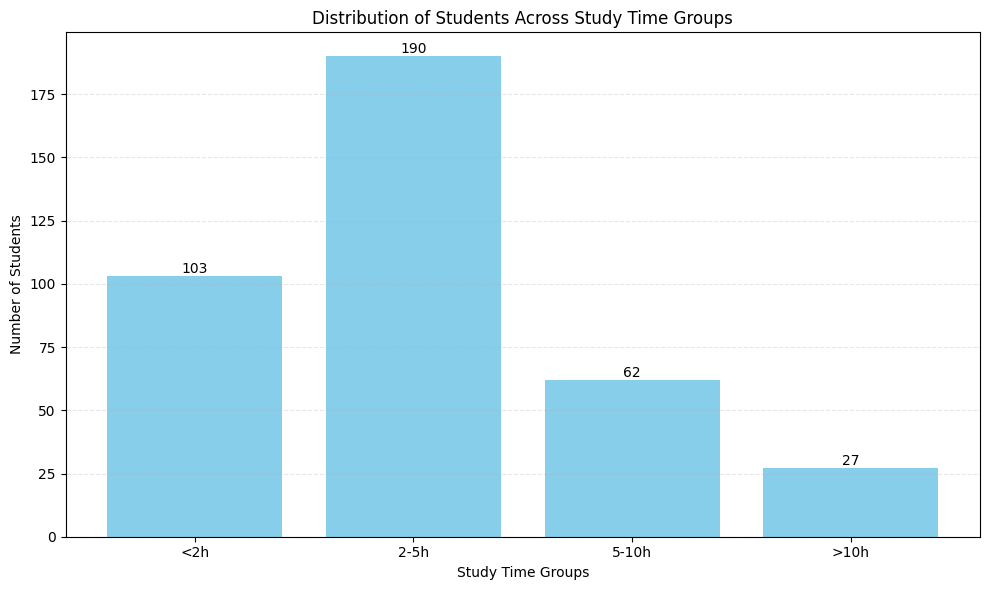


Percentage distribution of study time:
Group 1: 27.0%
Group 2: 49.7%
Group 3: 16.2%
Group 4: 7.1%


In [10]:
plt.figure(figsize=(10, 6))

study_time_counts = merged_data['studytime_x'].value_counts().sort_index()

bars = plt.bar(range(1, 5), study_time_counts, color='skyblue')
plt.title('Distribution of Students Across Study Time Groups')
plt.xlabel('Study Time Groups')
plt.ylabel('Number of Students')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.xticks(range(1, 5), ['<2h', '2-5h', '5-10h', '>10h'])

plt.grid(True, linestyle='--', alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

percentages = (study_time_counts / len(merged_data) * 100).round(1)
print("\nPercentage distribution of study time:")
for group, percentage in percentages.items():
    print(f"Group {group}: {percentage}%")

We also want to check the relationship between study time and grades.

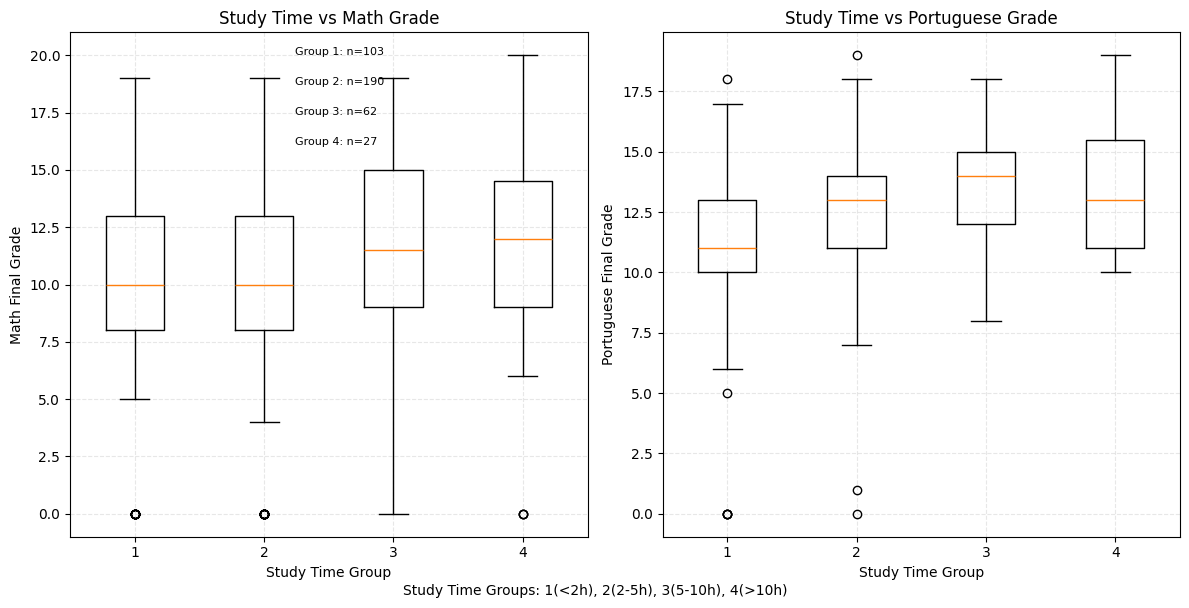


Math Grade Statistics by Study Time:
             count       mean       std  min  25%   50%   75%   max
studytime_x                                                        
1            103.0  10.097087  4.991197  0.0  8.0  10.0  13.0  19.0
2            190.0  10.100000  4.358960  0.0  8.0  10.0  13.0  19.0
3             62.0  11.370968  4.805168  0.0  9.0  11.5  15.0  19.0
4             27.0  11.259259  5.281263  0.0  9.0  12.0  14.5  20.0

Portuguese Grade Statistics by Study Time:
             count       mean       std   min   25%   50%   75%   max
studytime_x                                                          
1            103.0  11.233010  3.367095   0.0  10.0  11.0  13.0  18.0
2            190.0  12.673684  2.660477   0.0  11.0  13.0  14.0  19.0
3             62.0  13.774194  2.264620   8.0  12.0  14.0  15.0  18.0
4             27.0  13.407407  2.804656  10.0  11.0  13.0  15.5  19.0


In [34]:
plt.figure(figsize=(12, 6))

# create two subplots
plt.subplot(1, 2, 1)
# the boxplot of the math grade
plt.boxplot([merged_data[merged_data['studytime_x'] == i]['G3_x'] for i in range(1, 5)])
plt.title('Study Time vs Math Grade')
plt.xlabel('Study Time Group')
plt.ylabel('Math Final Grade')
plt.grid(True, linestyle='--', alpha=0.3)

plt.subplot(1, 2, 2)
# the boxplot of the portuguese grade
plt.boxplot([merged_data[merged_data['studytime_x'] == i]['G3_y'] for i in range(1, 5)])
plt.title('Study Time vs Portuguese Grade')
plt.xlabel('Study Time Group')
plt.ylabel('Portuguese Final Grade')
plt.grid(True, linestyle='--', alpha=0.3)

plt.figtext(0.5, 0, 'Study Time Groups: 1(<2h), 2(2-5h), 3(5-10h), 4(>10h)', 
            ha='center', fontsize=10)

for i in range(1, 5):
    count = len(merged_data[merged_data['studytime_x'] == i])
    plt.figtext(0.25, 0.95 - i*0.05, f'Group {i}: n={count}', fontsize=8)

plt.tight_layout()
plt.show()

print("\nMath Grade Statistics by Study Time:")
print(merged_data.groupby('studytime_x')['G3_x'].describe())
print("\nPortuguese Grade Statistics by Study Time:")
print(merged_data.groupby('studytime_x')['G3_y'].describe())

The boxplots reveal a positive correlation between study time and academic performance, particularly pronounced in Portuguese. Math scores increased from an average of 10.10 (study time <2h) to 11.37 (5-10h), while Portuguese showed a more substantial improvement from 11.23 to 13.77 across the same groups.

## Conclusion


Our analysis of student performance data reveals several key findings:

1. **Correlation between Math and Portuguese Performance**
   - There is a moderate positive correlation (r = 0.480) between Math and Portuguese grades
   - When excluding students with zero Math scores (39 students), the correlation strengthens to 0.558
   - The zero scores in Math appear to be genuine exam results rather than absences, as these students showed regular attendance

2. **Impact of Study Time on Academic Performance**
   - Study time shows a positive relationship with academic achievement in both subjects
   - The effect is more pronounced in Portuguese, where average grades increased from 11.23 (<2h study) to 13.77 (5-10h study)
   - Math grades showed a more modest improvement, from 10.10 to 11.37 across the same study time range

These findings suggest that while performance in both subjects is related, Portuguese grades appear more responsive to increased study time. This insight could be valuable for developing targeted academic support strategies.